In [4]:
import numpy as np
import pandas as pd

In [5]:
data=pd.read_csv("TRAIN.csv",sep=",")
x=data.iloc[:,0:-1]
y=data.iloc[:,-1:]

In [6]:
data1=pd.read_csv("TEST.csv",sep=",")
x1=data1.iloc[:,0:-1]
y1=data1.iloc[:,-1:]


In [7]:
def plot_confusion_metrics(y_true, y_pred, model_name, sns=None):
    matrix = confusion_matrix(y_true, y_pred)
    sentiment_classes = ['Negative', 'Positive']
    sns.heatmap(matrix, cmap=plt.cm.Greens, annot=True, fmt="d",
                xticklabels=sentiment_classes, yticklabels=sentiment_classes)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title(f"Confusion Matrix for {model_name}",model_name)
    plt.show()

def plot_roc_curve(classifier, x, y, cv, fold_index):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()

    x, y = indexable(x, y)

    cv = check_cv(cv, y, classifier=is_classifier(classifier))
    scorer = check_scoring(classifier, scoring=None)

    for i, (train, test) in enumerate(cv.split(x, y)):
        result = []
        result.append(_fit_and_score(clone(classifier),x,y,scorer,train,test,fit_params=None,return_train_score=False,return_times=True,return_estimator=False,error_score=False,
                                verbose=0,parameters=None))

        X_train, y_train = _safe_split(classifier, x, y, train)
        X_test, y_test = _safe_split(classifier, x, y, test, train)

        classifier.fit(X_train, y_train)

        test_scores = _score(classifier, X_test, y_test, scorer)

        print("result",result)

        print(classifier.predict(x.iloc[test]))

        y_pred_proba = classifier.predict(x.iloc[test])

        # Find optimal threshold using Youden's Index
        fpr, tpr, thresholds = roc_curve(y.iloc[test], y_pred_proba)

        print("fpr, tpr, thresholds",fpr, tpr, thresholds)
        optimal_threshold = thresholds[np.argmax(tpr - fpr)]
        # Use optimal threshold to calculate predictions
        y_pred = (y_pred_proba >= optimal_threshold).astype(int)

        fpr, tpr, _ = roc_curve(y.iloc[test], y_pred_proba)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        # print(classifier)
        # rfc_disp = metrics.plot_roc_curve(classifier,x.iloc[train], y.iloc[train])
        # rfc_disp.figure_.suptitle("ROC curve comparison")
        ax.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0

    # 计算AUC的平均值和标准误差
    mean_auc = auc(mean_fpr, mean_tpr)
    std_err_auc = np.std(fold_aucs) / np.sqrt(len(fold_aucs))

    # 计算95%置信区间
    lower_bound = mean_auc - 1.96 * std_err_auc
    upper_bound = mean_auc + 1.96 * std_err_auc

    # 打印结果
    print("4-Fold AUC的平均值: {:.2f}".format(mean_auc))
    print("4-Fold  95%置信区间: [{:.2f}, {:.2f}]".format(lower_bound, upper_bound))

    ax.plot(mean_fpr, mean_tpr, color='b', label='Mean ROC (AUC = %0.2f)' % mean_auc, lw=2)
    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title=f'Receiver Operating Characteristic Fold {fold_index}')
    ax.legend(loc="lower right")
    # plt.show()
    plt.savefig(f'Receiver Operating Characteristic Fold {fold_index}.png')
    # Calculate sensitivity and specificity at the optimal threshold

    # plot_confusion_metrics(y.iloc[test], y_pred, classifier)
    tn, fp, fn, tp = confusion_matrix(y.iloc[test], y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    return specificity, sensitivity

e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:

best_params {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
AUC for Fold 1: 1.00
AUC for Fold 2: 0.96
AUC for Fold 3: 0.80
AUC for Fold 4: 1.00
Mean AUC Score: 0.9395833333333334
95% Confidence Interval: [0.81, 1.00]


e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:

result [{'fit_error': None, 'test_scores': 1.0, 'fit_time': 0.03599882125854492, 'score_time': 0.002000570297241211}]
[1 1 1 1 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0. 1. 1.] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.9, 'fit_time': 0.034000396728515625, 'score_time': 0.0020003318786621094}]
[1 1 1 0 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0.         0.83333333 1.        ] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.036004066467285156, 'score_time': 0.001997709274291992}]
[1 1 1 0 1 0 1 0 0 0]
fpr, tpr, thresholds [0.  0.2 1. ] [0.  0.8 1. ] [inf  1.  0.]


e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:

result [{'fit_error': None, 'test_scores': 0.9, 'fit_time': 0.03399968147277832, 'score_time': 0.0009996891021728516}]
[1 0 1 1 1 0 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0.  0.8 1. ] [inf  1.  0.]
4-Fold AUC的平均值: 0.90
4-Fold  95%置信区间: [0.82, 0.98]
Fold 1: Specificity = 1.00, Sensitivity = 0.80
result [{'fit_error': None, 'test_scores': 1.0, 'fit_time': 0.03600049018859863, 'score_time': 0.0009999275207519531}]
[1 1 1 1 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0. 1. 1.] [inf  1.  0.]


e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:

result [{'fit_error': None, 'test_scores': 0.9, 'fit_time': 0.038997650146484375, 'score_time': 0.001001119613647461}]
[1 1 1 0 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0.         0.83333333 1.        ] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.034999847412109375, 'score_time': 0.0019998550415039062}]
[1 1 1 0 1 0 1 0 0 0]
fpr, tpr, thresholds [0.  0.2 1. ] [0.  0.8 1. ] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.9, 'fit_time': 0.03800034523010254, 'score_time': 0.00099945068359375}]
[1 0 1 1 1 0 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0.  0.8 1. ] [inf  1.  0.]
4-Fold AUC的平均值: 0.90
4-Fold  95%置信区间: [0.82, 0.98]


e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:

Fold 2: Specificity = 1.00, Sensitivity = 0.80
result [{'fit_error': None, 'test_scores': 1.0, 'fit_time': 0.03599834442138672, 'score_time': 0.0009996891021728516}]
[1 1 1 1 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0. 1. 1.] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.9, 'fit_time': 0.03600049018859863, 'score_time': 0.00099945068359375}]
[1 1 1 0 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0.         0.83333333 1.        ] [inf  1.  0.]


e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:

result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.03436732292175293, 'score_time': 0.0020012855529785156}]
[1 1 1 0 1 0 1 0 0 0]
fpr, tpr, thresholds [0.  0.2 1. ] [0.  0.8 1. ] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.9, 'fit_time': 0.034999847412109375, 'score_time': 0.0019996166229248047}]
[1 0 1 1 1 0 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0.  0.8 1. ] [inf  1.  0.]
4-Fold AUC的平均值: 0.90
4-Fold  95%置信区间: [0.82, 0.98]
Fold 3: Specificity = 1.00, Sensitivity = 0.80


e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:

result [{'fit_error': None, 'test_scores': 1.0, 'fit_time': 0.03499960899353027, 'score_time': 0.0009999275207519531}]
[1 1 1 1 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0. 1. 1.] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.9, 'fit_time': 0.03600263595581055, 'score_time': 0.0019981861114501953}]
[1 1 1 0 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0.         0.83333333 1.        ] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.03499960899353027, 'score_time': 0.0009999275207519531}]
[1 1 1 0 1 0 1 0 0 0]
fpr, tpr, thresholds [0.  0.2 1. ] [0.  0.8 1. ] [inf  1.  0.]


e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:

result [{'fit_error': None, 'test_scores': 0.9, 'fit_time': 0.034999847412109375, 'score_time': 0.00099945068359375}]
[1 0 1 1 1 0 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0.  0.8 1. ] [inf  1.  0.]
4-Fold AUC的平均值: 0.90
4-Fold  95%置信区间: [0.82, 0.98]
Fold 4: Specificity = 1.00, Sensitivity = 0.80
the mean Specificity 1.0
the mean Sensitivity 0.8


e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:

Best ROC AUC Score: 0.98
95% Confidence Interval: [0.76, 0.80]
Best Parameters:
{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
Confusion Matrix:
[[8 2]
 [2 5]]
Specificity: 0.80
Sensitivity: 0.71


e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:

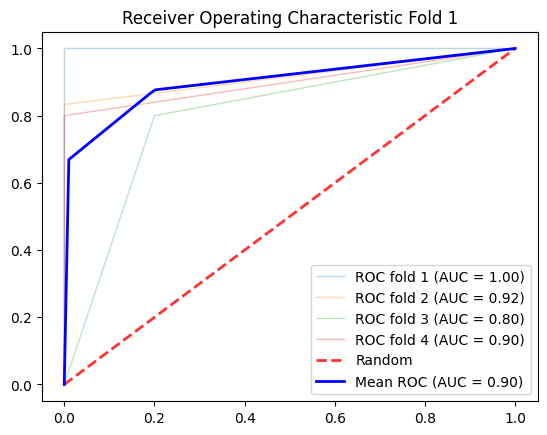

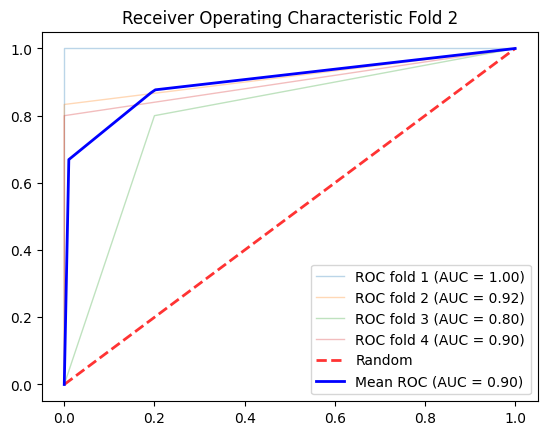

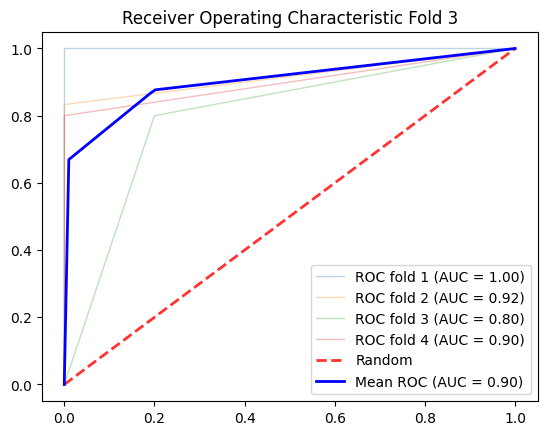

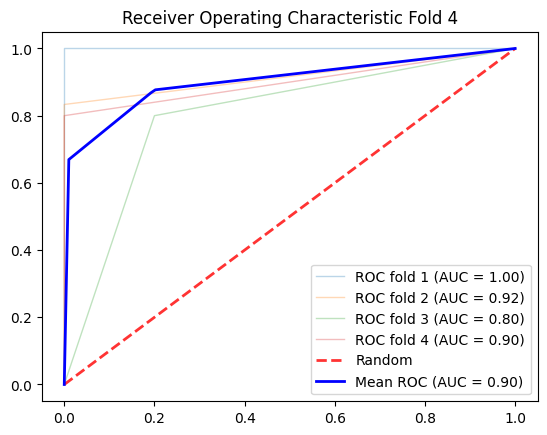

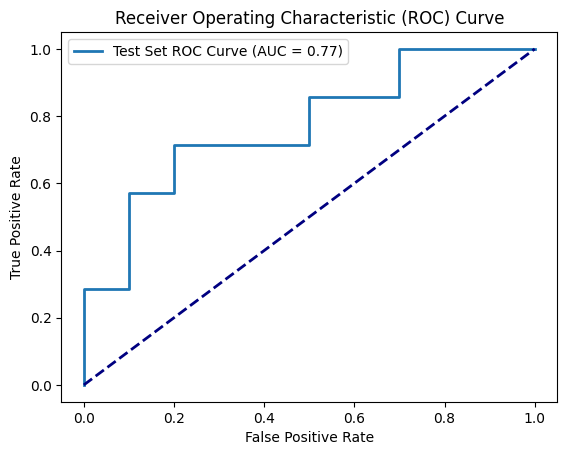

Best threshold: 0.34347
J-index: 0.51429


In [8]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import mean
from sklearn import metrics
from sklearn.base import is_classifier, clone
from sklearn.model_selection._validation import _fit_and_score, _score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, check_cv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample, indexable
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, check_scoring
from sklearn.utils.metaestimators import _safe_split
# Create ANN classifier
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (30, 30, 30)],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'activation': ['logistic', 'relu']
}

ann_classifier = MLPClassifier(random_state=42)

grid_search = GridSearchCV(ann_classifier, param_grid, cv=4, scoring='roc_auc', n_jobs=-1)
grid_search.fit(x, y)

# Get the best hyperparameter combination
best_params = grid_search.best_params_

print("best_params",best_params)

# Get the best ROC AUC score
best_roc_score = grid_search.best_score_

ann_classifier = MLPClassifier(activation="relu", alpha=0.0001,hidden_layer_sizes=(50, 50),random_state=42)

# Perform cross-validation
fold_aucs = cross_val_score(ann_classifier, x, y, cv=4, scoring='roc_auc')

# Print the AUC scores for each fold
for i, auc_score in enumerate(fold_aucs):
    print(f"AUC for Fold {i+1}: {auc_score:.2f}")

# Calculate the mean AUC score and confidence interval
mean_auc = np.mean(fold_aucs)
confidence_interval = np.percentile(fold_aucs, [2.5, 97.5])

# Output the mean AUC score and confidence interval
print("Mean AUC Score:", mean_auc)
print("95% Confidence Interval: [{:.2f}, {:.2f}]".format(confidence_interval[0], confidence_interval[1]))

# 假设你已经执行了网格搜索并获得了每个fold的AUC值，存储在一个名为"fold_aucs"的列表中。
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

specificity_list = []
sensitivity_list = []

for fold_index, (train, test) in enumerate(cv.split(x, y)):
    specificity, sensitivity = plot_roc_curve(ann_classifier, x, y, cv, fold_index+1)
    specificity_list.append(specificity)
    sensitivity_list.append(sensitivity)
    print(f"Fold {fold_index+1}: Specificity = {specificity:.2f}, Sensitivity = {sensitivity:.2f}")

mean_specificity = mean(np.array(specificity_list))
mean_sensitivity = mean(np.array(sensitivity_list))
print(f"the mean Specificity",mean_specificity)
print(f"the mean Sensitivity",mean_sensitivity)

# Perform bootstrapping to calculate confidence interval
n_iterations = 10
scores = []
for _ in range(n_iterations):
    # Resample data
    x_resampled, y_resampled = resample(x, y)

    # Train LDA classifier on resampled data
    best_ann_classifier_resampled = MLPClassifier(hidden_layer_sizes=grid_search.best_params_['hidden_layer_sizes'],
                                                  alpha=grid_search.best_params_['alpha'],
                                                  activation=grid_search.best_params_['activation'],
                                                  random_state=42)
    best_ann_classifier_resampled.fit(x_resampled, y_resampled)

    # Predict on the test set
    y_prob_test_resampled = best_ann_classifier_resampled.predict_proba(x1)[:, 1]

    # Calculate ROC AUC score on the test set
    roc_score_test_resampled = roc_auc_score(y1, y_prob_test_resampled)
    scores.append(roc_score_test_resampled)

# Calculate the confidence interval
lower_bound = np.percentile(scores, 2.5)
upper_bound = np.percentile(scores, 97.5)

# Output the best ROC AUC score and confidence interval
print(f"Best ROC AUC Score: {best_roc_score:.2f}")
print(f"95% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")
print("Best Parameters:")
print(best_params)

# Use the best parameters to train the model on the entire training set
best_ann_classifier = MLPClassifier(hidden_layer_sizes=grid_search.best_params_['hidden_layer_sizes'],
                                    alpha=grid_search.best_params_['alpha'],
                                    activation=grid_search.best_params_['activation'],
                                    random_state=42)
best_ann_classifier.fit(x, y)

# Predict on the test set
y_prob_test = best_ann_classifier.predict_proba(x1)[:, 1]

# Calculate threshold using Youden's index
fpr, tpr, thresholds = roc_curve(y1, y_prob_test)
j_index = tpr - fpr
best_threshold_idx = np.argmax(j_index)
best_threshold = thresholds[best_threshold_idx]

# Use threshold to predict classes
y_pred_test = np.where(y_prob_test >= best_threshold, 1, 0)

# Create confusion matrix
cm = confusion_matrix(y1, y_pred_test)

# Calculate specificity and sensitivity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print specificity and sensitivity
print(f"Specificity: {specificity:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")

# Calculate ROC AUC score on the test set
roc_score_test = roc_auc_score(y1, y_prob_test)

# Plot the ROC curve on the test set
fpr_test, tpr_test, _ = roc_curve(y1, y_prob_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure() 
plt.plot(fpr_test, tpr_test, lw=2) 
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Curve') 
plt.legend(['Test Set ROC Curve (AUC = %0.2f)' % roc_auc_test]) 
plt.show() 

print(f"Best threshold: {best_threshold:.5f}")
print(f"J-index: {j_index[best_threshold_idx]:.5f}")

e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

best_params {'C': 10}
AUC for Fold 1: 1.00
AUC for Fold 2: 1.00
AUC for Fold 3: 0.76
AUC for Fold 4: 1.00
Mean AUC Score: 0.9400000000000001
95% Confidence Interval: [0.78, 1.00]
result [{'fit_error': None, 'test_scores': 1.0, 'fit_time': 0.0020003318786621094, 'score_time': 0.0009999275207519531}]
[1 1 1 1 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0. 1. 1.] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.9, 'fit_time': 0.0020008087158203125, 'score_time': 0.0009989738464355469}]
[1 1 1 0 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0.         0.83333333 1.        ] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.7, 'fit_time': 0.0019996166229248047, 'score_time': 0.0010008811950683594}]
[1 1 1 0 1 1 1 0 0 0]
fpr, tpr, thresholds [0.  0.4 1. ] [0.  0.8 1. ] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.002000093460083008, 'score_time': 0.0009996891021728516}]
[1 0 1 1 1 0 1 0 0 0]
fpr, tpr, thresholds [0.  0.2 1. ] [0.  0.8 1. ] 

e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

result [{'fit_error': None, 'test_scores': 1.0, 'fit_time': 0.002000093460083008, 'score_time': 0.0010004043579101562}]
[1 1 1 1 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0. 1. 1.] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.9, 'fit_time': 0.0029990673065185547, 'score_time': 0.0009999275207519531}]
[1 1 1 0 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0.         0.83333333 1.        ] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.7, 'fit_time': 0.0009999275207519531, 'score_time': 0.0020012855529785156}]
[1 1 1 0 1 1 1 0 0 0]
fpr, tpr, thresholds [0.  0.4 1. ] [0.  0.8 1. ] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.0019996166229248047, 'score_time': 0.0010001659393310547}]
[1 0 1 1 1 0 1 0 0 0]
fpr, tpr, thresholds [0.  0.2 1. ] [0.  0.8 1. ] [inf  1.  0.]
4-Fold AUC的平均值: 0.85
4-Fold  95%置信区间: [0.75, 0.95]
Fold 3: Specificity = 0.80, Sensitivity = 0.80
result [{'fit_error': None, 'test_scores': 1.0, 'fit_time': 0.00199

e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Best ROC AUC Score: 0.9400000000000001
95% Confidence Interval: [0.66, 0.83]
Best Parameters:
{'C': 10}
Confusion Matrix:
[[8 2]
 [2 5]]
Specificity: 0.8
Sensitivity: 0.7142857142857143


e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


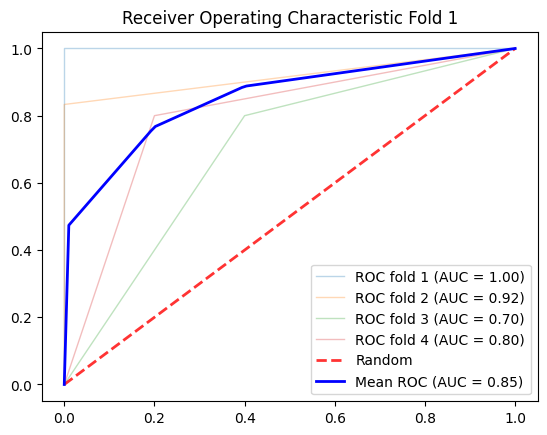

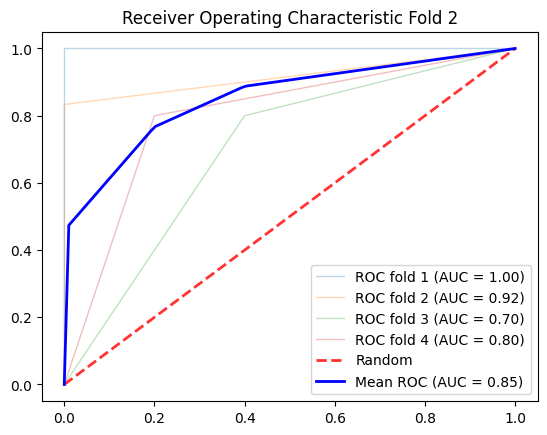

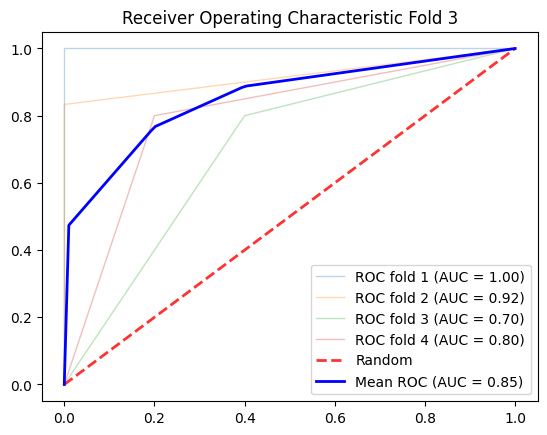

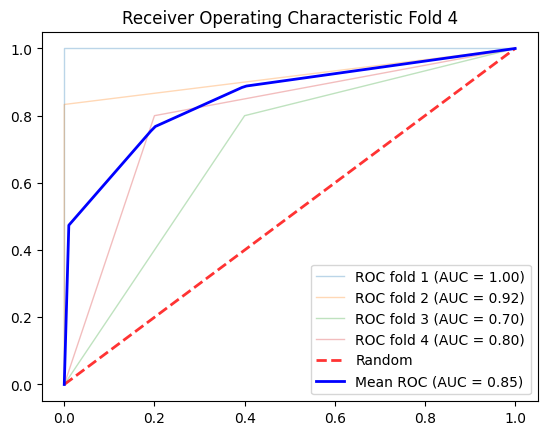

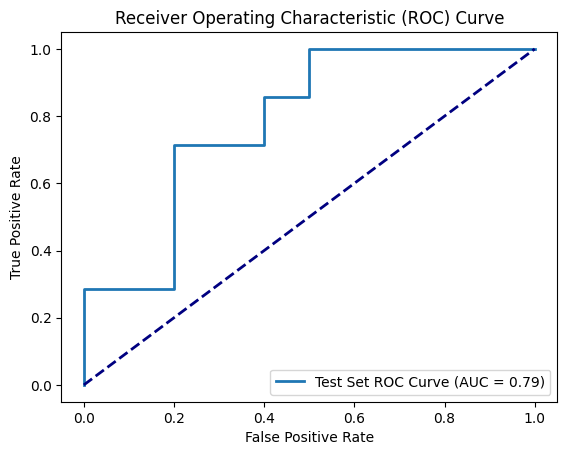

Best threshold: 0.004470509936370033
J-index: 0.5142857142857142


In [9]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt

# Create Lasso classifier
lasso_classifier = LogisticRegression(penalty='l1', solver='liblinear')

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
}

# Perform grid search cross-validation
grid_search = GridSearchCV(lasso_classifier, param_grid, cv=4, scoring='roc_auc', n_jobs=-1)
grid_search.fit(x, y)

# Get the best hyperparameter combination
best_params = grid_search.best_params_

print("best_params", best_params)

# Get the best ROC AUC score
best_roc_score = grid_search.best_score_

# Create Lasso classifier with best parameters
lasso_classifier = LogisticRegression(penalty='l1', solver='liblinear', C=best_params['C'])

# Perform cross-validation
fold_aucs = cross_val_score(lasso_classifier, x, y, cv=4, scoring='roc_auc')

# Print the AUC scores for each fold
for i, auc_score in enumerate(fold_aucs):
    print(f"AUC for Fold {i+1}: {auc_score:.2f}")

# Calculate the mean AUC score and confidence interval
mean_auc = np.mean(fold_aucs)
confidence_interval = np.percentile(fold_aucs, [2.5, 97.5])

# Output the mean AUC score and confidence interval
print("Mean AUC Score:", mean_auc)
print("95% Confidence Interval: [{:.2f}, {:.2f}]".format(confidence_interval[0], confidence_interval[1]))

# Define the plot_confusion_metrics() and plot_roc_curve() functions...

# Perform cross-validation and plot ROC curve for each fold
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
specificity_list = []
sensitivity_list = []

for fold_index, (train, test) in enumerate(cv.split(x, y)):
    specificity, sensitivity = plot_roc_curve(lasso_classifier, x, y, cv, fold_index+1)
    specificity_list.append(specificity)
    sensitivity_list.append(sensitivity)
    print(f"Fold {fold_index+1}: Specificity = {specificity:.2f}, Sensitivity = {sensitivity:.2f}")

mean_specificity = np.mean(specificity_list)
mean_sensitivity = np.mean(sensitivity_list)
print("The mean Specificity:", mean_specificity)
print("The mean Sensitivity:", mean_sensitivity)

# Perform bootstrapping to calculate confidence interval
n_iterations = 1000
scores = []
for _ in range(n_iterations):
    # Resample data
    x_resampled, y_resampled = resample(x, y)

    # Train Lasso classifier on resampled data
    best_lasso_classifier_resampled = LogisticRegression(penalty='l1', solver='liblinear', C=best_params['C'])
    best_lasso_classifier_resampled.fit(x_resampled, y_resampled)

    # Predict on the test set
    y_prob_test_resampled = best_lasso_classifier_resampled.predict_proba(x1)[:, 1]

    # Calculate ROC AUC score on the test set
    roc_score_test_resampled = roc_auc_score(y1, y_prob_test_resampled)
    scores.append(roc_score_test_resampled)

# Calculate the confidence interval
lower_bound = np.percentile(scores, 2.5)
upper_bound = np.percentile(scores, 97.5)

# Output the best ROC AUC score and confidence interval
print("Best ROC AUC Score:", best_roc_score)
print("95% Confidence Interval: [{:.2f}, {:.2f}]".format(lower_bound, upper_bound))
print("Best Parameters:")
print(best_params)

# Use the best parameters to train the model on the entire training set
best_lasso_classifier = LogisticRegression(penalty='l1', solver='liblinear', C=best_params['C'])
best_lasso_classifier.fit(x, y)

# Predict on the test set
y_prob_test = best_lasso_classifier.predict_proba(x1)[:, 1]

# Calculate threshold using Youden's index
fpr, tpr, thresholds = roc_curve(y1, y_prob_test)
j_index = tpr - fpr
best_threshold_idx = np.argmax(j_index)
best_threshold = thresholds[best_threshold_idx]

# Use threshold to predict classes
y_pred_test = np.where(y_prob_test >= best_threshold, 1, 0)

# Create confusion matrix
cm = confusion_matrix(y1, y_pred_test)

# Calculate specificity and sensitivity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print specificity and sensitivity
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

# Calculate ROC AUC score on the test set
roc_score_test = roc_auc_score(y1, y_prob_test)

# Plot the ROC curve on the test set
fpr_test, tpr_test, _ = roc_curve(y1, y_prob_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(['Test Set ROC Curve (AUC = {:.2f})'.format(roc_auc_test)])
plt.show()

print("Best threshold:", best_threshold)
print("J-index:", j_index[best_threshold_idx])

e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


best_params {'max_features': 2, 'max_samples': 3, 'n_estimators': 61}


e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC for Fold 1: 0.96
AUC for Fold 2: 0.92
AUC for Fold 3: 0.88
AUC for Fold 4: 1.00
Mean AUC Score: 0.93875
95% Confidence Interval: [0.88, 1.00]


e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result [{'fit_error': None, 'test_scores': 1.0, 'fit_time': 0.4050004482269287, 'score_time': 0.029999494552612305}]
[1 1 1 1 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0. 1. 1.] [inf  1.  0.]


e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.4050006866455078, 'score_time': 0.03099989891052246}]
[1 1 1 0 1 1 0 0 1 0]
fpr, tpr, thresholds [0.   0.25 1.  ] [0.         0.83333333 1.        ] [inf  1.  0.]


e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result [{'fit_error': None, 'test_scores': 0.7, 'fit_time': 0.40265512466430664, 'score_time': 0.03299999237060547}]
[1 1 1 0 1 0 1 1 0 0]
fpr, tpr, thresholds [0.  0.4 1. ] [0.  0.8 1. ] [inf  1.  0.]


e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.4140005111694336, 'score_time': 0.030999422073364258}]
[1 0 1 1 1 0 1 0 0 0]
fpr, tpr, thresholds [0.  0.2 1. ] [0.  0.8 1. ] [inf  1.  0.]
4-Fold AUC的平均值: 0.82
4-Fold  95%置信区间: [0.78, 0.87]
Fold 1: Specificity = 0.80, Sensitivity = 0.80


e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result [{'fit_error': None, 'test_scores': 1.0, 'fit_time': 0.4029994010925293, 'score_time': 0.031000375747680664}]
[1 1 1 1 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0. 1. 1.] [inf  1.  0.]


e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.41655826568603516, 'score_time': 0.029948711395263672}]
[1 1 1 0 1 1 0 0 1 0]
fpr, tpr, thresholds [0.   0.25 1.  ] [0.         0.83333333 1.        ] [inf  1.  0.]


e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result [{'fit_error': None, 'test_scores': 0.7, 'fit_time': 0.40400075912475586, 'score_time': 0.029999732971191406}]
[1 1 1 0 1 0 1 1 0 0]
fpr, tpr, thresholds [0.  0.4 1. ] [0.  0.8 1. ] [inf  1.  0.]


e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.40400004386901855, 'score_time': 0.034999847412109375}]
[1 0 1 1 1 0 1 0 0 0]
fpr, tpr, thresholds [0.  0.2 1. ] [0.  0.8 1. ] [inf  1.  0.]
4-Fold AUC的平均值: 0.82
4-Fold  95%置信区间: [0.78, 0.87]
Fold 2: Specificity = 0.80, Sensitivity = 0.80


e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result [{'fit_error': None, 'test_scores': 1.0, 'fit_time': 0.40799999237060547, 'score_time': 0.03300118446350098}]
[1 1 1 1 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0. 1. 1.] [inf  1.  0.]


e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.40400052070617676, 'score_time': 0.0299990177154541}]
[1 1 1 0 1 1 0 0 1 0]
fpr, tpr, thresholds [0.   0.25 1.  ] [0.         0.83333333 1.        ] [inf  1.  0.]


e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result [{'fit_error': None, 'test_scores': 0.7, 'fit_time': 0.405181884765625, 'score_time': 0.029999732971191406}]
[1 1 1 0 1 0 1 1 0 0]
fpr, tpr, thresholds [0.  0.4 1. ] [0.  0.8 1. ] [inf  1.  0.]


e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.40599894523620605, 'score_time': 0.03000164031982422}]
[1 0 1 1 1 0 1 0 0 0]
fpr, tpr, thresholds [0.  0.2 1. ] [0.  0.8 1. ] [inf  1.  0.]
4-Fold AUC的平均值: 0.82
4-Fold  95%置信区间: [0.78, 0.87]
Fold 3: Specificity = 0.80, Sensitivity = 0.80


e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result [{'fit_error': None, 'test_scores': 1.0, 'fit_time': 0.4090001583099365, 'score_time': 0.029999494552612305}]
[1 1 1 1 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0. 1. 1.] [inf  1.  0.]


e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.4475111961364746, 'score_time': 0.0299985408782959}]
[1 1 1 0 1 1 0 0 1 0]
fpr, tpr, thresholds [0.   0.25 1.  ] [0.         0.83333333 1.        ] [inf  1.  0.]


e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result [{'fit_error': None, 'test_scores': 0.7, 'fit_time': 0.41299986839294434, 'score_time': 0.030002117156982422}]
[1 1 1 0 1 0 1 1 0 0]
fpr, tpr, thresholds [0.  0.4 1. ] [0.  0.8 1. ] [inf  1.  0.]


e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.4089994430541992, 'score_time': 0.031000614166259766}]
[1 0 1 1 1 0 1 0 0 0]
fpr, tpr, thresholds [0.  0.2 1. ] [0.  0.8 1. ] [inf  1.  0.]
4-Fold AUC的平均值: 0.82
4-Fold  95%置信区间: [0.78, 0.87]
Fold 4: Specificity = 0.80, Sensitivity = 0.80
The mean Specificity: 0.8
The mean Sensitivity: 0.8


e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Best ROC AUC Score: 0.94875
95% Confidence Interval: [0.41, 0.72]
Best Parameters:
{'max_features': 2, 'max_samples': 3, 'n_estimators': 61}


e:\python-3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[9 1]
 [4 3]]
Specificity: 0.9
Sensitivity: 0.42857142857142855


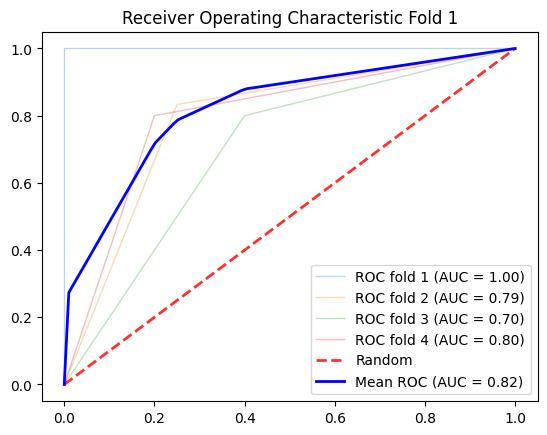

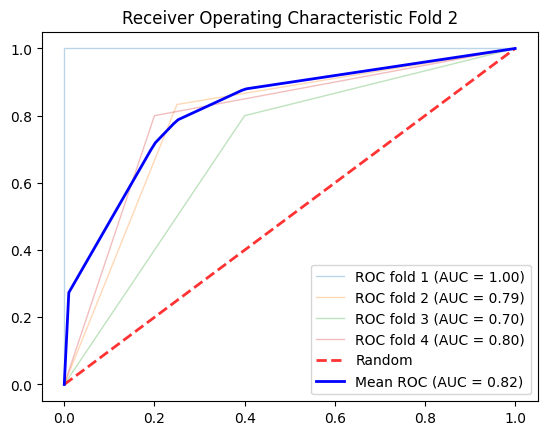

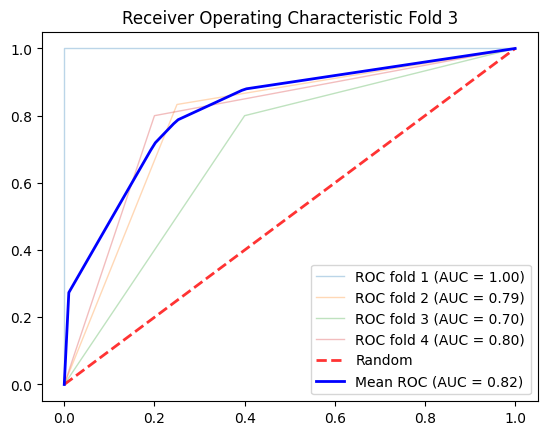

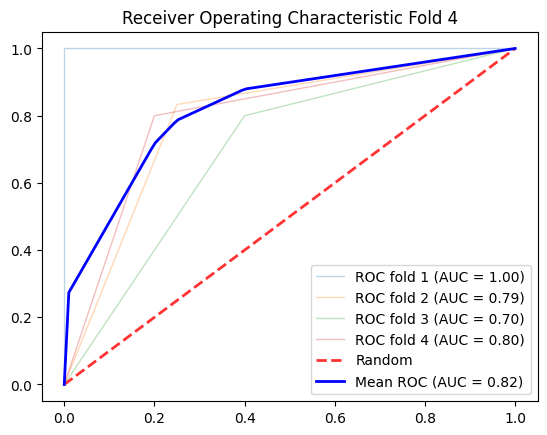

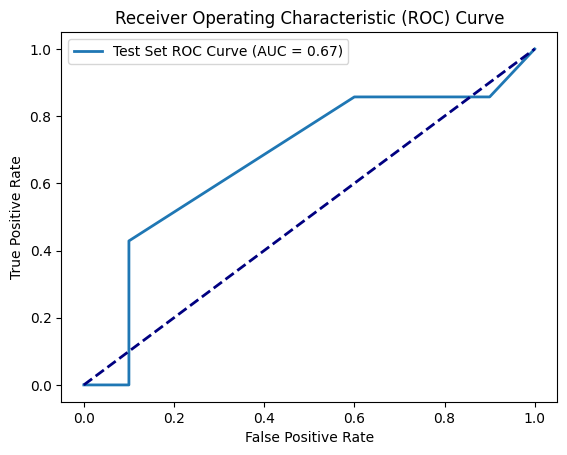

Best threshold: 0.3967213114754099
J-index: 0.3285714285714285


In [14]:
# Import libraries
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt

# Create Bagging classifier
param_grid = {
    'n_estimators': range(1,100,10),
    'max_samples': [1,2,3],
    'max_features': [2,3]
}

bagging_classifier = BaggingClassifier(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(bagging_classifier, param_grid, cv=4, scoring='roc_auc', n_jobs=-1)
grid_search.fit(x, y)

# Get the best hyperparameter combination
best_params = grid_search.best_params_

print("best_params", best_params)

# Get the best ROC AUC score
best_roc_score = grid_search.best_score_

# Create Bagging classifier with best parameters
best_bagging_classifier = BaggingClassifier(bagging_classifier, n_estimators=best_params['n_estimators'], max_samples=best_params['max_samples'], max_features=best_params['max_features'],random_state=42)

# Perform cross-validation
fold_aucs = cross_val_score(best_bagging_classifier, x, y, cv=4, scoring='roc_auc')

# Print the AUC scores for each fold
for i, auc_score in enumerate(fold_aucs):
    print(f"AUC for Fold {i+1}: {auc_score:.2f}")

# Calculate the mean AUC score and confidence interval
mean_auc = np.mean(fold_aucs)
confidence_interval = np.percentile(fold_aucs, [2.5, 97.5])

# Output the mean AUC score and confidence interval
print("Mean AUC Score:", mean_auc)
print("95% Confidence Interval: [{:.2f}, {:.2f}]".format(confidence_interval[0], confidence_interval[1]))

# Define the plot_confusion_metrics() and plot_roc_curve() functions...

# Perform cross-validation and plot ROC curve for each fold
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
specificity_list = []
sensitivity_list = []

for fold_index, (train, test) in enumerate(cv.split(x, y)):
    specificity, sensitivity = plot_roc_curve(best_bagging_classifier, x, y, cv, fold_index+1)
    specificity_list.append(specificity)
    sensitivity_list.append(sensitivity)
    print(f"Fold {fold_index+1}: Specificity = {specificity:.2f}, Sensitivity = {sensitivity:.2f}")

mean_specificity = np.mean(specificity_list)
mean_sensitivity = np.mean(sensitivity_list)
print("The mean Specificity:", mean_specificity)
print("The mean Sensitivity:", mean_sensitivity)

# Perform bootstrapping to calculate confidence interval
n_iterations = 500
scores = []
for _ in range(n_iterations):
    # Resample data
    x_resampled, y_resampled = resample(x, y)

    # Train Bagging classifier on resampled data
    best_bagging_classifier_resampled = BaggingClassifier(bagging_classifier, n_estimators=best_params['n_estimators'], max_samples=best_params['max_samples'], max_features=best_params['max_features'],random_state=29)
    best_bagging_classifier_resampled.fit(x_resampled, y_resampled)

    # Predict on the test set
    y_prob_test_resampled = best_bagging_classifier_resampled.predict_proba(x1)[:, 1]

    # Calculate ROC AUC score on the test set
    roc_score_test_resampled = roc_auc_score(y1, y_prob_test_resampled)
    scores.append(roc_score_test_resampled)

# Calculate the confidence interval
lower_bound = np.percentile(scores, 2.5)
upper_bound = np.percentile(scores, 97.5)

# Output the best ROC AUC score and confidence interval
print("Best ROC AUC Score:", best_roc_score)
print("95% Confidence Interval: [{:.2f}, {:.2f}]".format(lower_bound, upper_bound))
print("Best Parameters:")
print(best_params)

# Use the best parameters to train the model on the entire training set
best_bagging_classifier.fit(x, y)

# Predict on the test set
y_prob_test = best_bagging_classifier.predict_proba(x1)[:, 1]

# Calculate threshold using Youden's index
fpr, tpr, thresholds = roc_curve(y1, y_prob_test)
j_index = tpr - fpr
best_threshold_idx = np.argmax(j_index)
best_threshold = thresholds[best_threshold_idx]

# Use threshold to predict classes
y_pred_test = np.where(y_prob_test >= best_threshold, 1, 0)

# Create confusion matrix
cm = confusion_matrix(y1, y_pred_test)

# Calculate specificity and sensitivity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print specificity and sensitivity
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

# Calculate ROC AUC score on the test set
roc_score_test = roc_auc_score(y1, y_prob_test)

# Plot the ROC curve on the test set
fpr_test, tpr_test, _ = roc_curve(y1, y_prob_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(['Test Set ROC Curve (AUC = {:.2f})'.format(roc_auc_test)])
plt.show()

print("Best threshold:", best_threshold)
print("J-index:", j_index[best_threshold_idx])

e:\python-3.11\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
4 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "e:\python-3.11\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\python-3.11\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\python-3.11\Lib\site-packages\sklearn\discriminant_analysis.py", line 621, in fit
    raise NotImplementedError("shrinkage not supported wit

best_params {'shrinkage': 'auto', 'solver': 'lsqr'}
AUC for Fold 1: 0.96
AUC for Fold 2: 1.00
AUC for Fold 3: 0.76
AUC for Fold 4: 1.00
Mean AUC Score: 0.9295833333333334
95% Confidence Interval: [0.77, 1.00]
result [{'fit_error': None, 'test_scores': 1.0, 'fit_time': 0.0019989013671875, 'score_time': 0.0019996166229248047}]
[1 1 1 1 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0. 1. 1.] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 1.0, 'fit_time': 0.002000093460083008, 'score_time': 0.001999378204345703}]
[1 1 1 1 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0. 1. 1.] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.002000093460083008, 'score_time': 0.001999378204345703}]
[1 1 1 0 1 0 1 0 0 0]
fpr, tpr, thresholds [0.  0.2 1. ] [0.  0.8 1. ] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 1.0, 'fit_time': 0.002000093460083008, 'score_time': 0.0010001659393310547}]
[1 1 1 1 1 0 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0. 1. 1.] [inf  1

e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Best ROC AUC Score: 0.9295833333333334
95% Confidence Interval: [0.67, 0.84]
Best Parameters:
{'shrinkage': 'auto', 'solver': 'lsqr'}
Confusion Matrix:
[[8 2]
 [1 6]]
Specificity: 0.8
Sensitivity: 0.8571428571428571


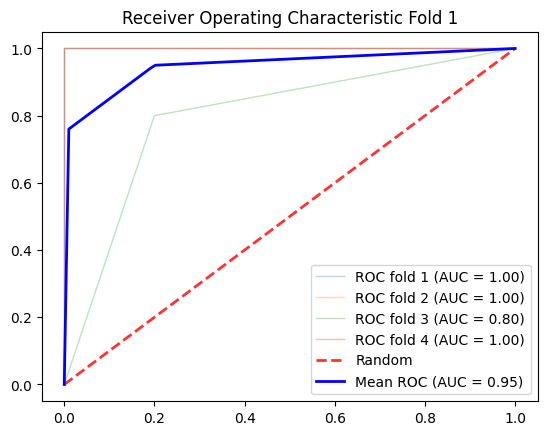

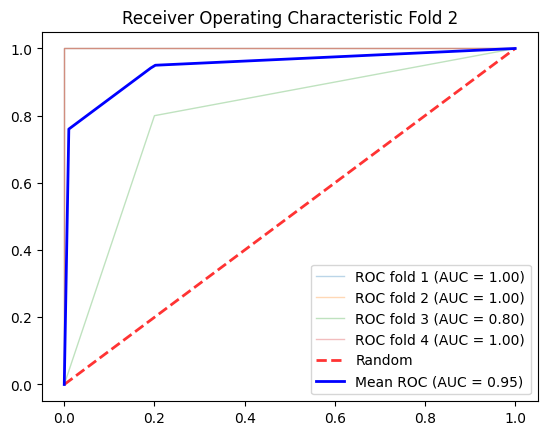

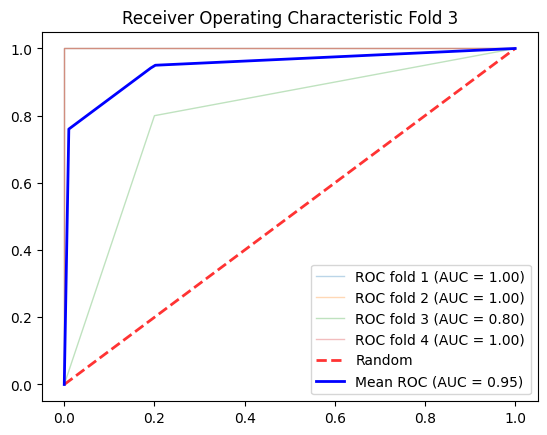

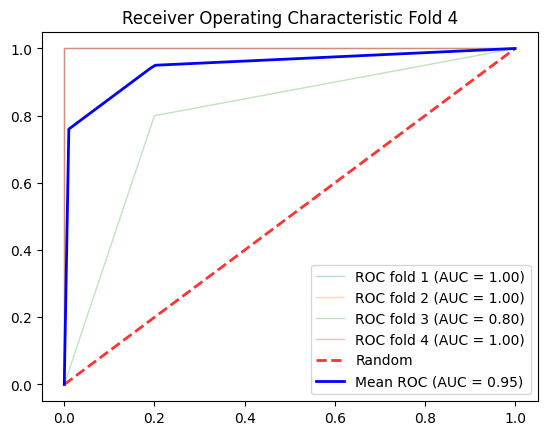

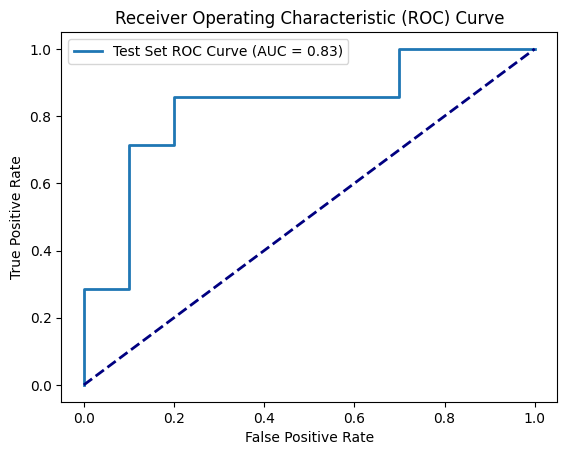

Best threshold: 0.0012731991784855356
J-index: 0.657142857142857


In [11]:
# Import libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt

# Create LDA classifier
lda_classifier = LinearDiscriminantAnalysis()

# Define parameter grid
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto']
}

# Perform grid search cross-validation
grid_search = GridSearchCV(lda_classifier, param_grid, cv=4, scoring='roc_auc', n_jobs=-1)
grid_search.fit(x, y)

# Get the best hyperparameter combination
best_params = grid_search.best_params_

print("best_params", best_params)

# Get the best ROC AUC score
best_roc_score = grid_search.best_score_

# Create LDA classifier with best parameters
lda_classifier = LinearDiscriminantAnalysis(solver=best_params['solver'], shrinkage=best_params['shrinkage'])

# Perform cross-validation
fold_aucs = cross_val_score(lda_classifier, x, y, cv=4, scoring='roc_auc')

# Print the AUC scores for each fold
for i, auc_score in enumerate(fold_aucs):
    print(f"AUC for Fold {i+1}: {auc_score:.2f}")

# Calculate the mean AUC score and confidence interval
mean_auc = np.mean(fold_aucs)
confidence_interval = np.percentile(fold_aucs, [2.5, 97.5])

# Output the mean AUC score and confidence interval
print("Mean AUC Score:", mean_auc)
print("95% Confidence Interval: [{:.2f}, {:.2f}]".format(confidence_interval[0], confidence_interval[1]))

# Define the plot_confusion_metrics() and plot_roc_curve() functions...

# Perform cross-validation and plot ROC curve for each fold
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
specificity_list = []
sensitivity_list = []

for fold_index, (train, test) in enumerate(cv.split(x, y)):
    specificity, sensitivity = plot_roc_curve(lda_classifier, x, y, cv, fold_index+1)
    specificity_list.append(specificity)
    sensitivity_list.append(sensitivity)
    print(f"Fold {fold_index+1}: Specificity = {specificity:.2f}, Sensitivity = {sensitivity:.2f}")

mean_specificity = np.mean(specificity_list)
mean_sensitivity = np.mean(sensitivity_list)
print("The mean Specificity:", mean_specificity)
print("The mean Sensitivity:", mean_sensitivity)

# Perform bootstrapping to calculate confidence interval
n_iterations = 1000
scores = []
for _ in range(n_iterations):
    # Resample data
    x_resampled, y_resampled = resample(x, y)

    # Train LDA classifier on resampled data
    best_lda_classifier_resampled = LinearDiscriminantAnalysis(solver=best_params['solver'], shrinkage=best_params['shrinkage'])
    best_lda_classifier_resampled.fit(x_resampled, y_resampled)

    # Predict on the test set
    y_prob_test_resampled = best_lda_classifier_resampled.predict_proba(x1)[:, 1]

    # Calculate ROC AUC score on the test set
    roc_score_test_resampled = roc_auc_score(y1, y_prob_test_resampled)
    scores.append(roc_score_test_resampled)

# Calculate the confidence interval
lower_bound = np.percentile(scores, 2.5)
upper_bound = np.percentile(scores, 97.5)

# Output the best ROC AUC score and confidence interval
print("Best ROC AUC Score:", best_roc_score)
print("95% Confidence Interval: [{:.2f}, {:.2f}]".format(lower_bound, upper_bound))
print("Best Parameters:")
print(best_params)

# Use the best parameters to train the model on the entire training set
best_lda_classifier = LinearDiscriminantAnalysis(solver=best_params['solver'], shrinkage=best_params['shrinkage'])
best_lda_classifier.fit(x, y)

# Predict on the test set
y_prob_test = best_lda_classifier.predict_proba(x1)[:, 1]

# Calculate threshold using Youden's index
fpr, tpr, thresholds = roc_curve(y1, y_prob_test)
j_index = tpr - fpr
best_threshold_idx = np.argmax(j_index)
best_threshold = thresholds[best_threshold_idx]

# Use threshold to predict classes
y_pred_test = np.where(y_prob_test >= best_threshold, 1, 0)

# Create confusion matrix
cm = confusion_matrix(y1, y_pred_test)

# Calculate specificity and sensitivity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print specificity and sensitivity
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

# Calculate ROC AUC score on the test set
roc_score_test = roc_auc_score(y1, y_prob_test)

# Plot the ROC curve on the test set
fpr_test, tpr_test, _ = roc_curve(y1, y_prob_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(['Test Set ROC Curve (AUC = {:.2f})'.format(roc_auc_test)])
plt.show()

print("Best threshold:", best_threshold)
print("J-index:", j_index[best_threshold_idx])

e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

best_params {'reg_param': 0.01}
AUC for Fold 1: 1.00
AUC for Fold 2: 0.96
AUC for Fold 3: 0.80
AUC for Fold 4: 1.00
Mean AUC Score: 0.9395833333333334
95% Confidence Interval: [0.81, 1.00]
result [{'fit_error': None, 'test_scores': 1.0, 'fit_time': 0.0009999275207519531, 'score_time': 0.0019998550415039062}]
[1 1 1 1 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0. 1. 1.] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.0010004043579101562, 'score_time': 0.0019996166229248047}]
[1 1 1 0 1 1 0 0 1 0]
fpr, tpr, thresholds [0.   0.25 1.  ] [0.         0.83333333 1.        ] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.0010006427764892578, 'score_time': 0.002002239227294922}]
[1 1 1 0 1 0 1 0 0 0]
fpr, tpr, thresholds [0.  0.2 1. ] [0.  0.8 1. ] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.9, 'fit_time': 0.0009984970092773438, 'score_time': 0.0010001659393310547}]
[1 0 1 1 1 0 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [

e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Best ROC AUC Score: 0.9395833333333334
95% Confidence Interval: [0.49, 0.83]
Best Parameters:
{'reg_param': 0.01}
Confusion Matrix:
[[7 3]
 [1 6]]
Specificity: 0.7
Sensitivity: 0.8571428571428571


e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversion

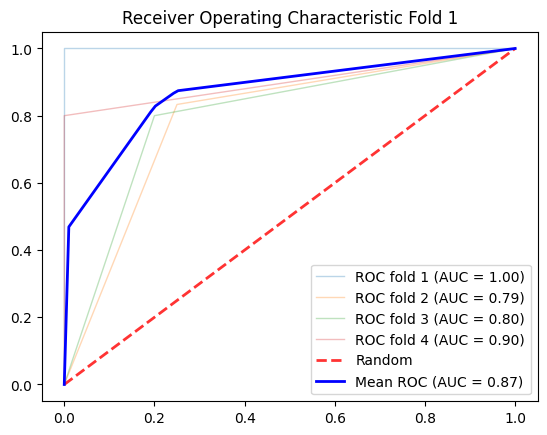

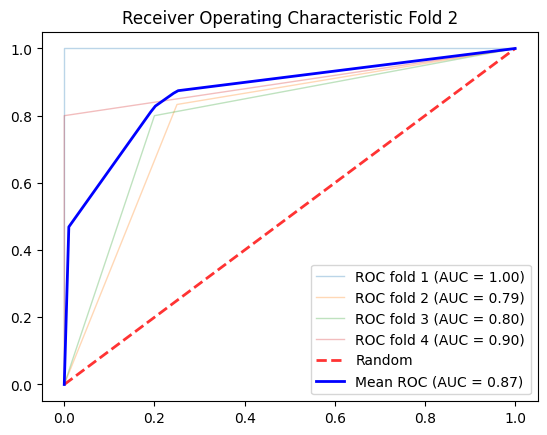

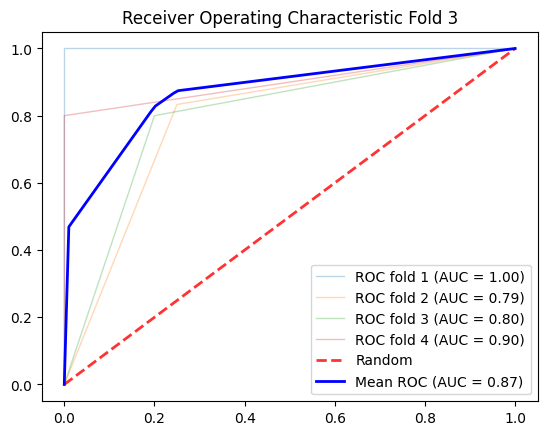

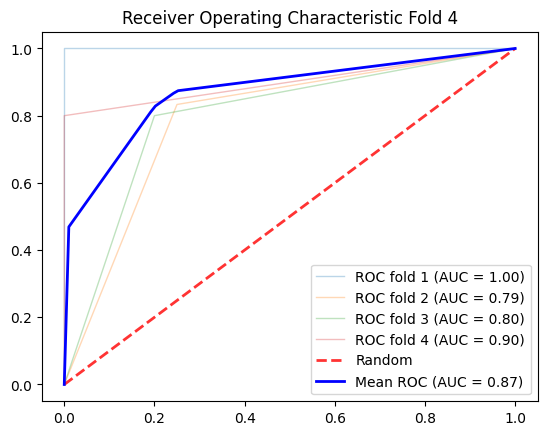

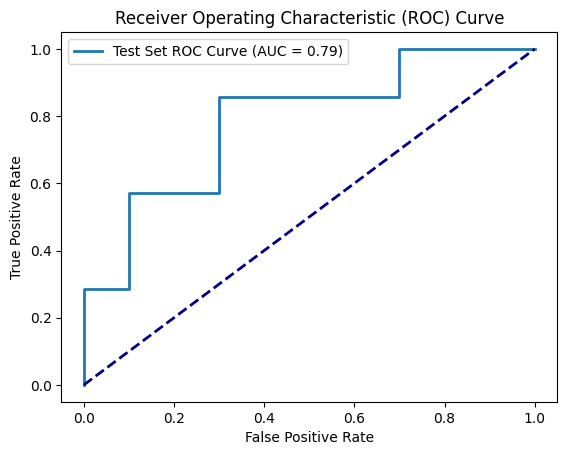

Best threshold: 0.02727947263936308
J-index: 0.5571428571428572


In [90]:
# Import libraries
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt

# Create QDA classifier
qda_classifier = QuadraticDiscriminantAnalysis()

# Define parameter grid
param_grid = {
    'reg_param': [0.0, 0.01, 0.1]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(qda_classifier, param_grid, cv=4, scoring='roc_auc', n_jobs=-1)
grid_search.fit(x, y)

# Get the best hyperparameter combination
best_params = grid_search.best_params_

print("best_params", best_params)

# Get the best ROC AUC score
best_roc_score = grid_search.best_score_

# Create QDA classifier with best parameters
qda_classifier = QuadraticDiscriminantAnalysis(reg_param=best_params['reg_param'])

# Perform cross-validation
fold_aucs = cross_val_score(qda_classifier, x, y, cv=4, scoring='roc_auc')

# Print the AUC scores for each fold
for i, auc_score in enumerate(fold_aucs):
    print(f"AUC for Fold {i+1}: {auc_score:.2f}")

# Calculate the mean AUC score and confidence interval
mean_auc = np.mean(fold_aucs)
confidence_interval = np.percentile(fold_aucs, [2.5, 97.5])

# Output the mean AUC score and confidence interval
print("Mean AUC Score:", mean_auc)
print("95% Confidence Interval: [{:.2f}, {:.2f}]".format(confidence_interval[0], confidence_interval[1]))

# Define the plot_confusion_metrics() and plot_roc_curve() functions...

# Perform cross-validation and plot ROC curve for each fold
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
specificity_list = []
sensitivity_list = []

for fold_index, (train, test) in enumerate(cv.split(x, y)):
    specificity, sensitivity = plot_roc_curve(qda_classifier, x, y, cv, fold_index+1)
    specificity_list.append(specificity)
    sensitivity_list.append(sensitivity)
    print(f"Fold {fold_index+1}: Specificity = {specificity:.2f}, Sensitivity = {sensitivity:.2f}")

mean_specificity = np.mean(specificity_list)
mean_sensitivity = np.mean(sensitivity_list)
print("The mean Specificity:", mean_specificity)
print("The mean Sensitivity:", mean_sensitivity)

# Perform bootstrapping to calculate confidence interval
n_iterations = 100
scores = []
for _ in range(n_iterations):
    # Resample data
    x_resampled, y_resampled = resample(x, y)

    # Train QDA classifier on resampled data
    best_qda_classifier_resampled = QuadraticDiscriminantAnalysis(reg_param=best_params['reg_param'])
    best_qda_classifier_resampled.fit(x_resampled, y_resampled)

    # Predict on the test set
    y_prob_test_resampled = best_qda_classifier_resampled.predict_proba(x1)[:, 1]

    # Calculate ROC AUC score on the test set
    roc_score_test_resampled = roc_auc_score(y1, y_prob_test_resampled)
    scores.append(roc_score_test_resampled)

# Calculate the confidence interval
lower_bound = np.percentile(scores, 2.5)
upper_bound = np.percentile(scores, 97.5)

# Output the best ROC AUC score and confidence interval
print("Best ROC AUC Score:", best_roc_score)
print("95% Confidence Interval: [{:.2f}, {:.2f}]".format(lower_bound, upper_bound))
print("Best Parameters:")
print(best_params)

# Use the best parameters to train the model on the entire training set
best_qda_classifier = QuadraticDiscriminantAnalysis(reg_param=best_params['reg_param'])
best_qda_classifier.fit(x, y)

# Predict on the test set
y_prob_test = best_qda_classifier.predict_proba(x1)[:, 1]

# Calculate threshold using Youden's index
fpr, tpr, thresholds = roc_curve(y1, y_prob_test)
j_index = tpr - fpr
best_threshold_idx = np.argmax(j_index)
best_threshold = thresholds[best_threshold_idx]

# Use threshold to predict classes
y_pred_test = np.where(y_prob_test >= best_threshold, 1, 0)

# Create confusion matrix
cm = confusion_matrix(y1, y_pred_test)

# Calculate specificity and sensitivity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print specificity and sensitivity
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

# Calculate ROC AUC score on the test set
roc_score_test = roc_auc_score(y1, y_prob_test)

# Plot the ROC curve on the test set
fpr_test, tpr_test, _ = roc_curve(y1, y_prob_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(['Test Set ROC Curve (AUC = {:.2f})'.format(roc_auc_test)])
plt.show()

print("Best threshold:", best_threshold)
print("J-index:", j_index[best_threshold_idx])

e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

AUC for Fold 1: 0.96
AUC for Fold 2: 0.92
AUC for Fold 3: 0.92
AUC for Fold 4: 1.00
Mean AUC Score: 0.94875
95% Confidence Interval: [0.92, 1.00]
result [{'fit_error': None, 'test_scores': 1.0, 'fit_time': 0.0029993057250976562, 'score_time': 0.003000020980834961}]
[1 1 1 1 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0. 1. 1.] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.0019998550415039062, 'score_time': 0.0009992122650146484}]
[1 1 1 0 1 1 0 0 1 0]
fpr, tpr, thresholds [0.   0.25 1.  ] [0.         0.83333333 1.        ] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.7, 'fit_time': 0.0009992122650146484, 'score_time': 0.0020012855529785156}]
[0 1 1 0 1 0 1 0 0 0]
fpr, tpr, thresholds [0.  0.2 1. ] [0.  0.6 1. ] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.0009987354278564453, 'score_time': 0.00099945068359375}]
[1 0 1 1 1 0 1 0 0 0]
fpr, tpr, thresholds [0.  0.2 1. ] [0.  0.8 1. ] [inf  1.  0.]
4-Fold AUC的平均值:

e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Fold 4: Specificity = 0.80, Sensitivity = 0.80
The mean Specificity: 0.8
The mean Sensitivity: 0.8


e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Best ROC AUC Score: 0.94875
95% Confidence Interval: [0.30, 0.86]
Confusion Matrix:
[[9 1]
 [3 4]]
Specificity: 0.9
Sensitivity: 0.5714285714285714


e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

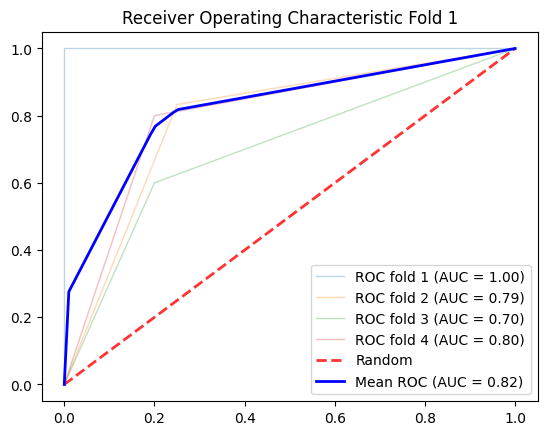

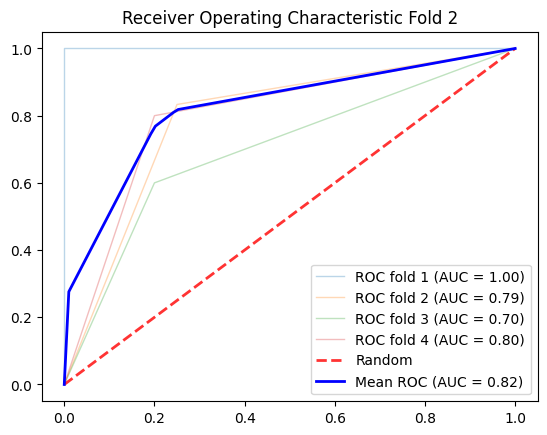

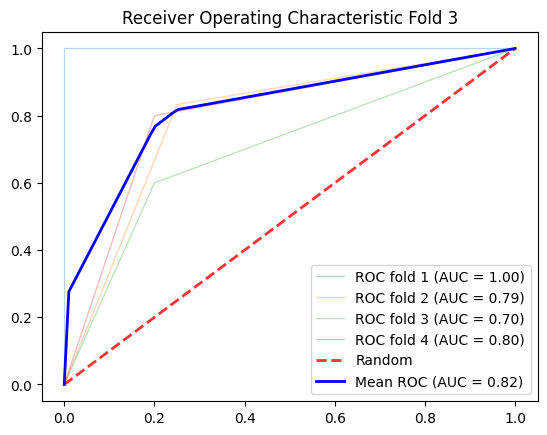

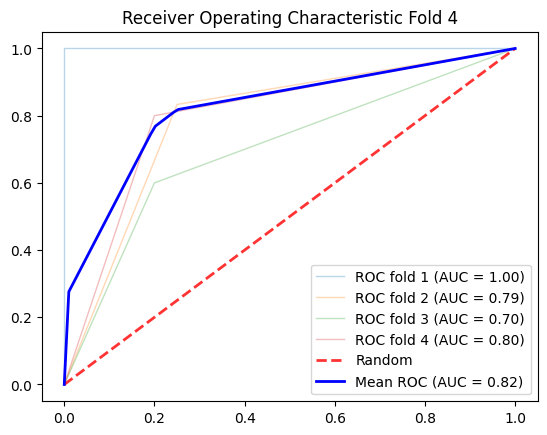

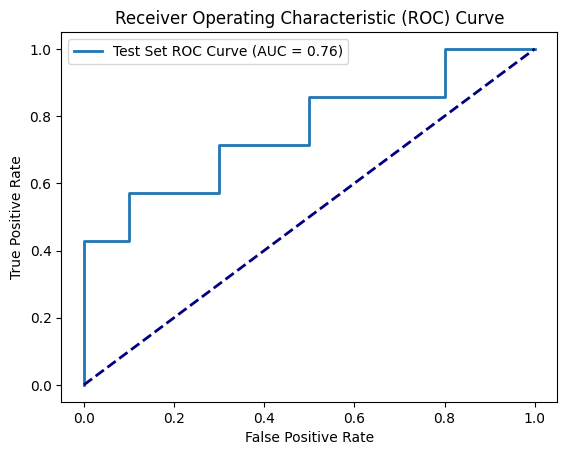

Best threshold: 3.883614990630761e-11
J-index: 0.4714285714285714


In [14]:
# Import libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt

# Create Naive Bayes classifier
nb_classifier = GaussianNB()

# Define parameter grid (no hyperparameters to tune for Naive Bayes)

# Perform grid search cross-validation (not required for Naive Bayes)

# Create Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
fold_aucs = cross_val_score(nb_classifier, x, y, cv=4, scoring='roc_auc')

# Print the AUC scores for each fold
for i, auc_score in enumerate(fold_aucs):
    print(f"AUC for Fold {i+1}: {auc_score:.2f}")

# Calculate the mean AUC score and confidence interval
mean_auc = np.mean(fold_aucs)
confidence_interval = np.percentile(fold_aucs, [2.5, 97.5])

# Output the mean AUC score and confidence interval
print("Mean AUC Score:", mean_auc)
print("95% Confidence Interval: [{:.2f}, {:.2f}]".format(confidence_interval[0], confidence_interval[1]))

# Define the plot_confusion_metrics() and plot_roc_curve() functions...

# Perform cross-validation and plot ROC curve for each fold
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
specificity_list = []
sensitivity_list = []

for fold_index, (train, test) in enumerate(cv.split(x, y)):
    specificity, sensitivity = plot_roc_curve(nb_classifier, x, y, cv, fold_index+1)
    specificity_list.append(specificity)
    sensitivity_list.append(sensitivity)
    print(f"Fold {fold_index+1}: Specificity = {specificity:.2f}, Sensitivity = {sensitivity:.2f}")

mean_specificity = np.mean(specificity_list)
mean_sensitivity = np.mean(sensitivity_list)
print("The mean Specificity:", mean_specificity)
print("The mean Sensitivity:", mean_sensitivity)

# Perform bootstrapping to calculate confidence interval
n_iterations = 100
scores = []
for _ in range(n_iterations):
    # Resample data
    x_resampled, y_resampled = resample(x, y)

    # Train Naive Bayes classifier on resampled data
    nb_classifier_resampled = GaussianNB()
    nb_classifier_resampled.fit(x_resampled, y_resampled)

    # Predict on the test set
    y_prob_test_resampled = nb_classifier_resampled.predict_proba(x1)[:, 1]

    # Calculate ROC AUC score on the test set
    roc_score_test_resampled = roc_auc_score(y1, y_prob_test_resampled)
    scores.append(roc_score_test_resampled)

# Calculate the confidence interval
lower_bound = np.percentile(scores, 2.5)
upper_bound = np.percentile(scores, 97.5)

# Output the best ROC AUC score and confidence interval
print("Best ROC AUC Score:", np.mean(fold_aucs))
print("95% Confidence Interval: [{:.2f}, {:.2f}]".format(lower_bound, upper_bound))

# Use the best parameters to train the model on the entire training set (not required for Naive Bayes)
nb_classifier.fit(x, y)

# Predict on the test set
y_prob_test = nb_classifier.predict_proba(x1)[:, 1]

# Calculate threshold using Youden's index
fpr, tpr, thresholds = roc_curve(y1, y_prob_test)
j_index = tpr - fpr
best_threshold_idx = np.argmax(j_index)
best_threshold = thresholds[best_threshold_idx]

# Use threshold to predict classes
y_pred_test = np.where(y_prob_test >= best_threshold, 1, 0)

# Create confusion matrix
cm = confusion_matrix(y1, y_pred_test)

# Calculate specificity and sensitivity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print specificity and sensitivity
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

# Calculate ROC AUC score on the test set
roc_score_test = roc_auc_score(y1, y_prob_test)

# Plot the ROC curve on the test set
fpr_test, tpr_test, _ = roc_curve(y1, y_prob_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(['Test Set ROC Curve (AUC = {:.2f})'.format(roc_auc_test)])
plt.show()

print("Best threshold:", best_threshold)
print("J-index:", j_index[best_threshold_idx])

e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

best_params {'C': 31, 'gamma': 0.1}
AUC for Fold 1: 1.00
AUC for Fold 2: 1.00
AUC for Fold 3: 0.80
AUC for Fold 4: 1.00
Mean AUC Score: 0.95
95% Confidence Interval: [0.82, 1.00]
result [{'fit_error': None, 'test_scores': 1.0, 'fit_time': 0.0019998550415039062, 'score_time': 0.0009999275207519531}]
[1 1 1 1 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0. 1. 1.] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 1.0, 'fit_time': 0.0009996891021728516, 'score_time': 0.0019998550415039062}]
[1 1 1 1 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0. 1. 1.] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.0010001659393310547, 'score_time': 0.002001523971557617}]
[1 1 1 0 1 0 1 0 0 0]
fpr, tpr, thresholds [0.  0.2 1. ] [0.  0.8 1. ] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 1.0, 'fit_time': 0.0010004043579101562, 'score_time': 0.00099945068359375}]
[1 1 1 1 1 0 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0. 1. 1.] [inf  1.  0.]
4-Fold AUC的平均值: 0.

e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Fold 4: Specificity = 1.00, Sensitivity = 1.00
The mean Specificity: 1.0
The mean Sensitivity: 1.0


e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python-3.11\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Best ROC AUC Score: 0.95
95% Confidence Interval: [0.71, 0.81]
Best Parameters:
{'C': 31, 'gamma': 0.1}
Confusion Matrix:
[[7 3]
 [1 6]]
Specificity: 0.7
Sensitivity: 0.8571428571428571


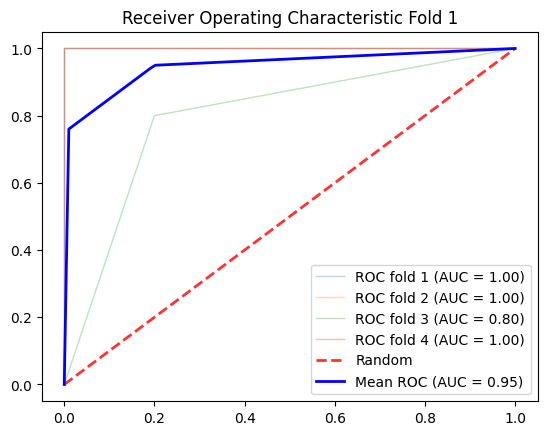

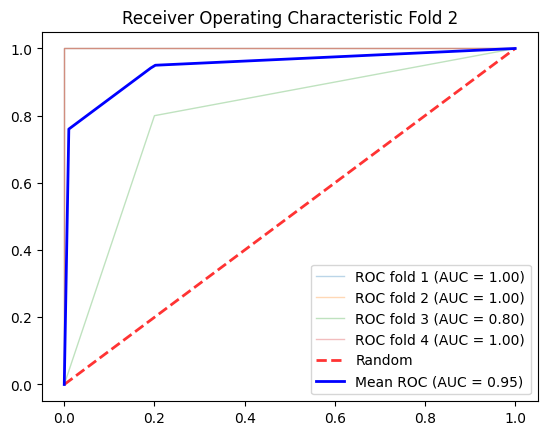

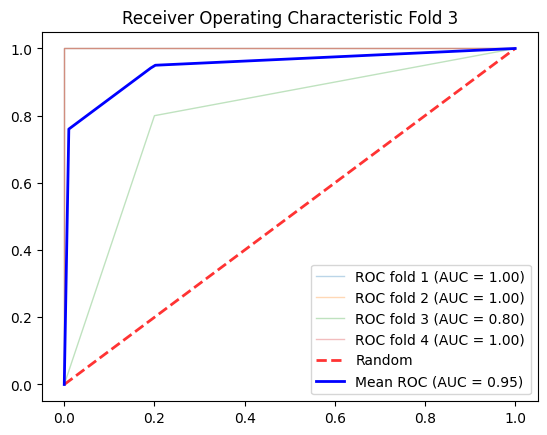

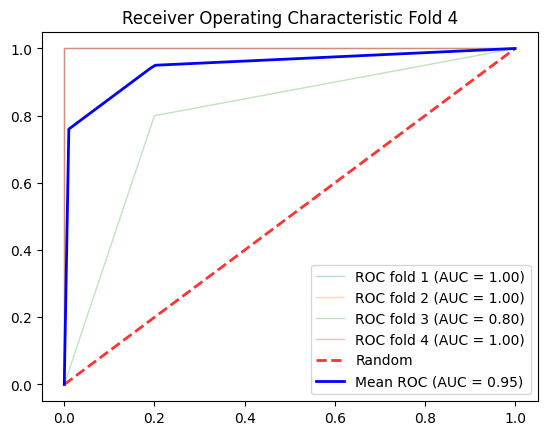

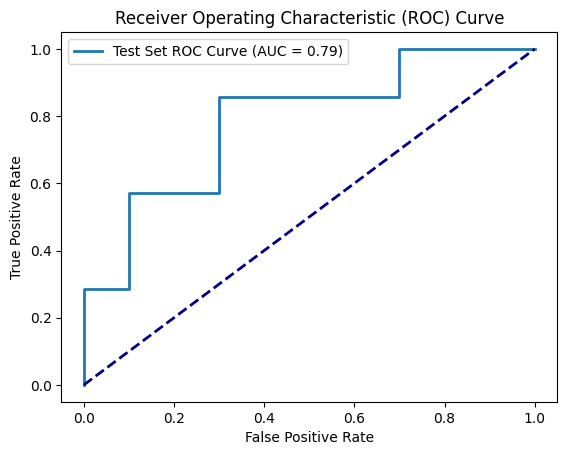

Best threshold: -1.5151665816989213
J-index: 0.5571428571428572


In [23]:
# Import libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt

# Create SVM classifier
svm_classifier = SVC(probability=True,random_state=42)

# Define parameter grid
param_grid = {
    'C': range(1,100,10),
    'gamma': [0.1, 0.01, 0.001],
}

# Perform grid search cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=4, scoring='roc_auc', n_jobs=-1)
grid_search.fit(x, y)

# Get the best hyperparameter combination
best_params = grid_search.best_params_

print("best_params", best_params)

# Get the best ROC AUC score
best_roc_score = grid_search.best_score_

# Create SVM classifier with best parameters
svm_classifier = SVC(C=grid_search.best_params_['C'], 
                     gamma=grid_search.best_params_['gamma'], 
                     probability=True,
                     random_state=42)

# Perform cross-validation
fold_aucs = cross_val_score(svm_classifier, x, y, cv=4, scoring='roc_auc')
# Print the AUC scores for each fold
for i, auc_score in enumerate(fold_aucs):
    print(f"AUC for Fold {i+1}: {auc_score:.2f}")

# Calculate the mean AUC score and confidence interval
mean_auc = np.mean(fold_aucs)
confidence_interval = np.percentile(fold_aucs, [2.5, 97.5])

# Output the mean AUC score and confidence interval
print("Mean AUC Score:", mean_auc)
print("95% Confidence Interval: [{:.2f}, {:.2f}]".format(confidence_interval[0], confidence_interval[1]))


# Define the plot_confusion_metrics() and plot_roc_curve() functions...
# (These functions need to be modified accordingly to work with SVM classifier)

# Perform cross-validation and plot ROC curve for each fold
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
specificity_list = []
sensitivity_list = []

for fold_index, (train, test) in enumerate(cv.split(x, y)):
    specificity, sensitivity = plot_roc_curve(svm_classifier, x, y, cv, fold_index+1)
    specificity_list.append(specificity)
    sensitivity_list.append(sensitivity)
    print(f"Fold {fold_index+1}: Specificity = {specificity:.2f}, Sensitivity = {sensitivity:.2f}")

mean_specificity = np.mean(specificity_list)
mean_sensitivity = np.mean(sensitivity_list)
print("The mean Specificity:", mean_specificity)
print("The mean Sensitivity:", mean_sensitivity)

# Perform bootstrapping to calculate confidence interval
n_iterations = 1000
scores = []
for _ in range(n_iterations):
    # Resample data
    x_resampled, y_resampled = resample(x, y)

    # Train SVM classifier on resampled data
    svm_classifier_resampled = SVC(C=grid_search.best_params_['C'], 
                     gamma=grid_search.best_params_['gamma'], 
                     probability=True,
                     random_state=42)
    svm_classifier_resampled.fit(x_resampled, y_resampled)

    # Predict on the test set
    y_prob_test_resampled = svm_classifier_resampled.decision_function(x1)

    # Calculate ROC AUC score on the test set
    roc_score_test_resampled = roc_auc_score(y1, y_prob_test_resampled)
    scores.append(roc_score_test_resampled)

# Calculate the confidence interval
lower_bound = np.percentile(scores, 2.5)
upper_bound = np.percentile(scores, 97.5)

# Output the best ROC AUC score and confidence interval
print("Best ROC AUC Score:", best_roc_score)
print("95% Confidence Interval: [{:.2f}, {:.2f}]".format(lower_bound, upper_bound))
print("Best Parameters:")
print(best_params)

# Use the best parameters to train the model on the entire training set
best_svm_classifier = SVC(**best_params)
best_svm_classifier.fit(x, y)

# Predict on the test set
y_prob_test = best_svm_classifier.decision_function(x1)

# Calculate threshold using Youden's index
fpr, tpr, thresholds = roc_curve(y1, y_prob_test)
j_index = tpr - fpr
best_threshold_idx = np.argmax(j_index)
best_threshold = thresholds[best_threshold_idx]

# Use threshold to predict classes
y_pred_test = np.where(y_prob_test >= best_threshold, 1, 0)

# Create confusion matrix
cm = confusion_matrix(y1, y_pred_test)

# Calculate specificity and sensitivity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print specificity and sensitivity
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

# Calculate ROC AUC score on the test set
roc_score_test = roc_auc_score(y1, y_prob_test)

# Plot the ROC curve on the test set
fpr_test, tpr_test, _ = roc_curve(y1, y_prob_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(['Test Set ROC Curve (AUC = {:.2f})'.format(roc_auc_test)])
plt.show()

print("Best threshold:", best_threshold)
print("J-index:", j_index[best_threshold_idx])

e:\python-3.11\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.85833333 0.85833333 0.85833333 ...        nan        nan        nan]
  warnings.warn(
e:\python-3.11\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\python-3.11\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\python-3.11\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\python-3.1

best_params {'leaf_size': 10, 'n_neighbors': 7, 'p': 3, 'weights': 'distance'}
AUC for Fold 1: 1.00
AUC for Fold 2: 1.00
AUC for Fold 3: 0.88
AUC for Fold 4: 1.00
Mean AUC Score: 0.97
95% Confidence Interval: [0.89, 1.00]
result [{'fit_error': None, 'test_scores': 0.9, 'fit_time': 0.0009999275207519531, 'score_time': 0.002000093460083008}]
[1 1 1 1 0 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0.         0.83333333 1.        ] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.9, 'fit_time': 0.0010001659393310547, 'score_time': 0.002000093460083008}]
[1 1 1 0 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0.         0.83333333 1.        ] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.0020003318786621094, 'score_time': 0.0009999275207519531}]
[1 1 1 0 1 0 1 0 0 0]
fpr, tpr, thresholds [0.  0.2 1. ] [0.  0.8 1. ] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.9, 'fit_time': 0.0009999275207519531, 'score_time': 0.0010004043579101562}]
[1 0 

e:\python-3.11\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\python-3.11\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\python-3.11\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\python-3.11\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ret

result [{'fit_error': None, 'test_scores': 0.9, 'fit_time': 0.002004861831665039, 'score_time': 0.002000093460083008}]
[1 1 1 1 0 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0.         0.83333333 1.        ] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.9, 'fit_time': 0.0009996891021728516, 'score_time': 0.0010004043579101562}]
[1 1 1 0 1 1 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0.         0.83333333 1.        ] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.8, 'fit_time': 0.0009999275207519531, 'score_time': 0.0009999275207519531}]
[1 1 1 0 1 0 1 0 0 0]
fpr, tpr, thresholds [0.  0.2 1. ] [0.  0.8 1. ] [inf  1.  0.]
result [{'fit_error': None, 'test_scores': 0.9, 'fit_time': 0.00099945068359375, 'score_time': 0.0020003318786621094}]
[1 0 1 1 1 0 0 0 0 0]
fpr, tpr, thresholds [0. 0. 1.] [0.  0.8 1. ] [inf  1.  0.]
4-Fold AUC的平均值: 0.88
4-Fold  95%置信区间: [0.83, 0.93]
Fold 3: Specificity = 1.00, Sensitivity = 0.80
result [{'fit_error': None, 'test_scores': 0.9, '

e:\python-3.11\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\python-3.11\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\python-3.11\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\python-3.11\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ret

Best ROC AUC Score: 0.97
95% Confidence Interval: [0.54, 0.76]
Best Parameters:
{'leaf_size': 10, 'n_neighbors': 7, 'p': 3, 'weights': 'distance'}
Confusion Matrix:
[[7 3]
 [2 5]]
Specificity: 0.7
Sensitivity: 0.7142857142857143


e:\python-3.11\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


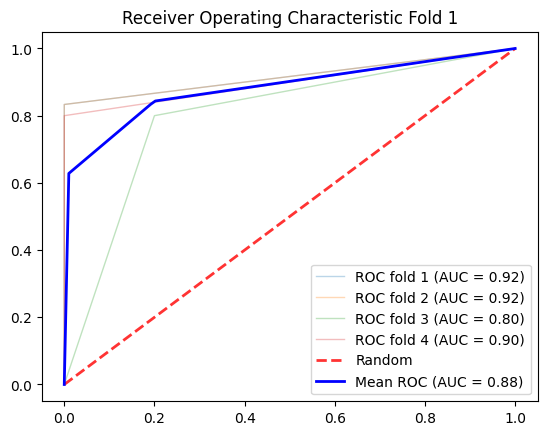

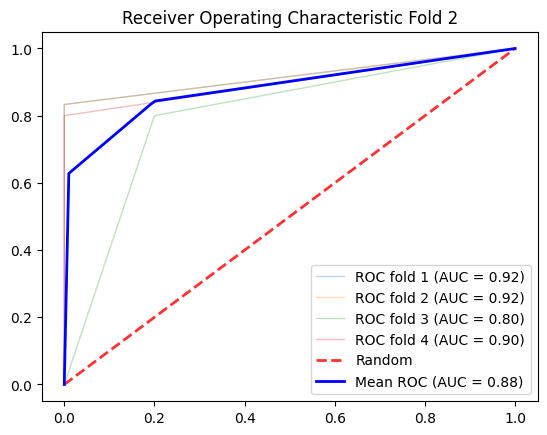

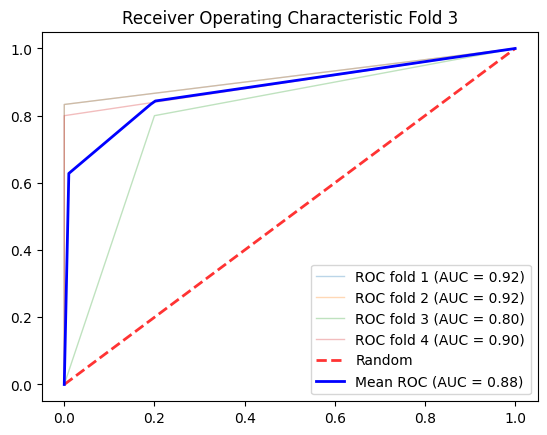

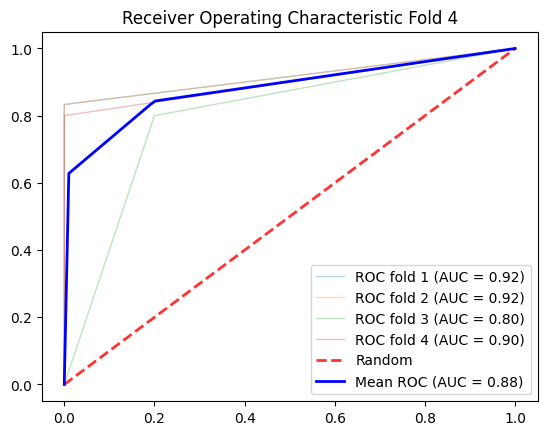

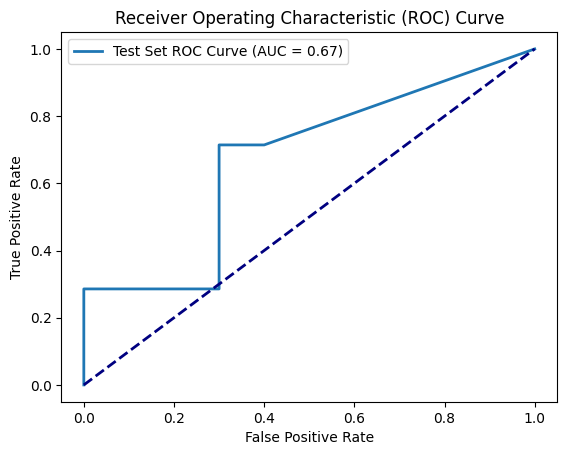

Best threshold: 0.1323432582711429
J-index: 0.4142857142857143


In [10]:
# Import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt

# Create KNN classifier
knn_classifier = KNeighborsClassifier()

# Define parameter grid
param_grid = {
    'n_neighbors': range(1, 500,2),
    'weights': ['uniform', 'distance'],
    'p': range(1,20),
    'leaf_size': range(10,40)
}

# Perform grid search cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=4, scoring='roc_auc', n_jobs=-1)
grid_search.fit(x, y)

# Get the best hyperparameter combination
best_params = grid_search.best_params_

print("best_params", best_params)

# Get the best ROC AUC score
best_roc_score = grid_search.best_score_

# Create KNN classifier with best parameters
knn_classifier = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                      weights=grid_search.best_params_['weights'],
                                      p=grid_search.best_params_['p'],
                                      leaf_size=grid_search.best_params_['leaf_size'])

# Perform cross-validation
fold_aucs = cross_val_score(knn_classifier, x, y, cv=4, scoring='roc_auc')
# Print the AUC scores for each fold
for i, auc_score in enumerate(fold_aucs):
    print(f"AUC for Fold {i+1}: {auc_score:.2f}")

# Calculate the mean AUC score and confidence interval
mean_auc = np.mean(fold_aucs)
confidence_interval = np.percentile(fold_aucs, [2.5, 97.5])

# Output the mean AUC score and confidence interval
print("Mean AUC Score:", mean_auc)
print("95% Confidence Interval: [{:.2f}, {:.2f}]".format(confidence_interval[0], confidence_interval[1]))

# Define the plot_confusion_metrics() and plot_roc_curve() functions...
# (These functions need to be modified accordingly to work with KNN classifier)

# Perform cross-validation and plot ROC curve for each fold
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
specificity_list = []
sensitivity_list = []

for fold_index, (train, test) in enumerate(cv.split(x, y)):
    specificity, sensitivity = plot_roc_curve(knn_classifier, x, y, cv, fold_index+1)
    specificity_list.append(specificity)
    sensitivity_list.append(sensitivity)
    print(f"Fold {fold_index+1}: Specificity = {specificity:.2f}, Sensitivity = {sensitivity:.2f}")

mean_specificity = np.mean(specificity_list)
mean_sensitivity = np.mean(sensitivity_list)
print("The mean Specificity:", mean_specificity)
print("The mean Sensitivity:", mean_sensitivity)

# Perform bootstrapping to calculate confidence interval
n_iterations = 1000
scores = []
for _ in range(n_iterations):
    # Resample data
    x_resampled, y_resampled = resample(x, y)

    # Train KNN classifier on resampled data
    knn_classifier_resampled = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                      weights=grid_search.best_params_['weights'],
                                      p=grid_search.best_params_['p'],
                                      leaf_size=grid_search.best_params_['leaf_size'])
    knn_classifier_resampled.fit(x_resampled, y_resampled)

    # Predict on the test set
    y_prob_test_resampled = knn_classifier_resampled.predict_proba(x1)[:, 1]

    # Calculate ROC AUC score on the test set
    roc_score_test_resampled = roc_auc_score(y1, y_prob_test_resampled)
    scores.append(roc_score_test_resampled)

# Calculate the confidence interval
lower_bound = np.percentile(scores, 2.5)
upper_bound = np.percentile(scores, 97.5)

# Output the best ROC AUC score and confidence interval
print("Best ROC AUC Score:", best_roc_score)
print("95% Confidence Interval: [{:.2f}, {:.2f}]".format(lower_bound, upper_bound))
print("Best Parameters:")
print(best_params)

# Use the best parameters to train the model on the entire training set
best_knn_classifier = KNeighborsClassifier(**best_params)
best_knn_classifier.fit(x, y)

# Predict on the test set
y_prob_test = best_knn_classifier.predict_proba(x1)[:, 1]

# Calculate threshold using Youden's index
fpr, tpr, thresholds = roc_curve(y1, y_prob_test)
j_index = tpr - fpr
best_threshold_idx = np.argmax(j_index)
best_threshold = thresholds[best_threshold_idx]

# Use threshold to predict classes
y_pred_test = np.where(y_prob_test >= best_threshold, 1, 0)

# Create confusion matrix
cm = confusion_matrix(y1, y_pred_test)

# Calculate specificity and sensitivity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print specificity and sensitivity
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

# Calculate ROC AUC score on the test set
roc_score_test = roc_auc_score(y1, y_prob_test)

# Plot the ROC curve on the test set
fpr_test, tpr_test, _ = roc_curve(y1, y_prob_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(['Test Set ROC Curve (AUC = {:.2f})'.format(roc_auc_test)])
plt.show()

print("Best threshold:", best_threshold)
print("J-index:", j_index[best_threshold_idx])

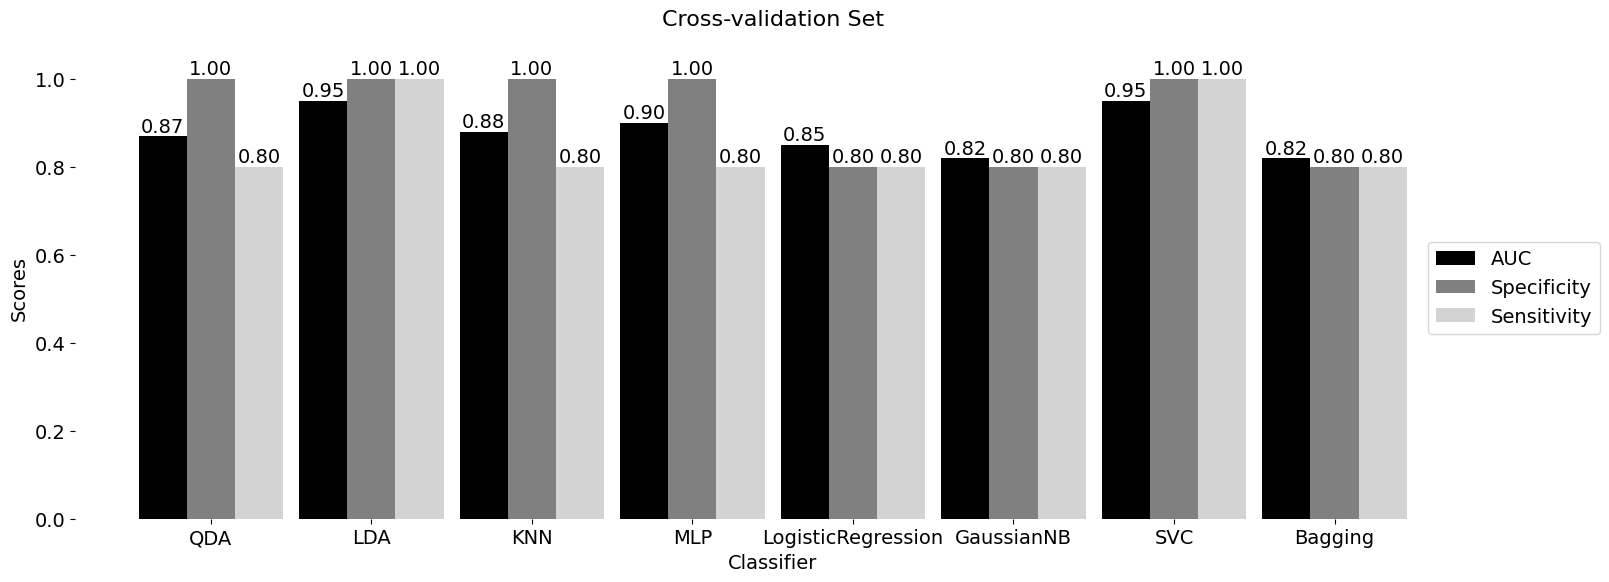

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# 假设您的数据存储在列表中
classifiers = ['QDA', 'LDA', 'KNN','MLP', 'LogisticRegression','GaussianNB', 'SVC','Bagging']
auc_scores = [0.87, 0.95, 0.88,0.90,0.85,0.82,0.95,0.82]
specificity_scores = [1, 1, 1,1,0.8,0.8,1,0.8]
sensitivity_scores = [0.8, 1, 0.8,0.8,0.8,0.8,1,0.8]

# 创建一个包含分类器的索引数组
x = np.arange(len(classifiers))

# 创建图形，并指定大小为10x6英寸
fig = plt.figure(figsize=(18, 6))

# 设置柱状图的宽度
width = 0.3

# 在柱状图上添加数字标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2., height,
                 '%.2f' % height,
                 ha='center', va='bottom',fontsize=14)

autolabel(plt.bar(x, auc_scores, width, label='AUC',color="black"))
autolabel(plt.bar(x + width, specificity_scores, width, label='Specificity',color="gray"))
autolabel(plt.bar(x + width*2, sensitivity_scores, width, label='Sensitivity',color="lightgray"))

# 设置x轴标签
plt.xlabel('Classifier', fontsize=14)
# 设置y轴标签
plt.ylabel('Scores', fontsize=14)
# 设置图例
plt.legend(loc=5, bbox_to_anchor=(1.1, 0.5),fontsize=14)
# 设置x轴刻度和y轴标签
plt.xticks(x + width, classifiers, fontsize=14)
plt.yticks(fontsize=14)
# 去掉边框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.title("Cross-validation Set", fontsize=16,y=1.05)
# 保存图片
plt.savefig('chart1.pdf', format='pdf')
# 显示图形
plt.show()

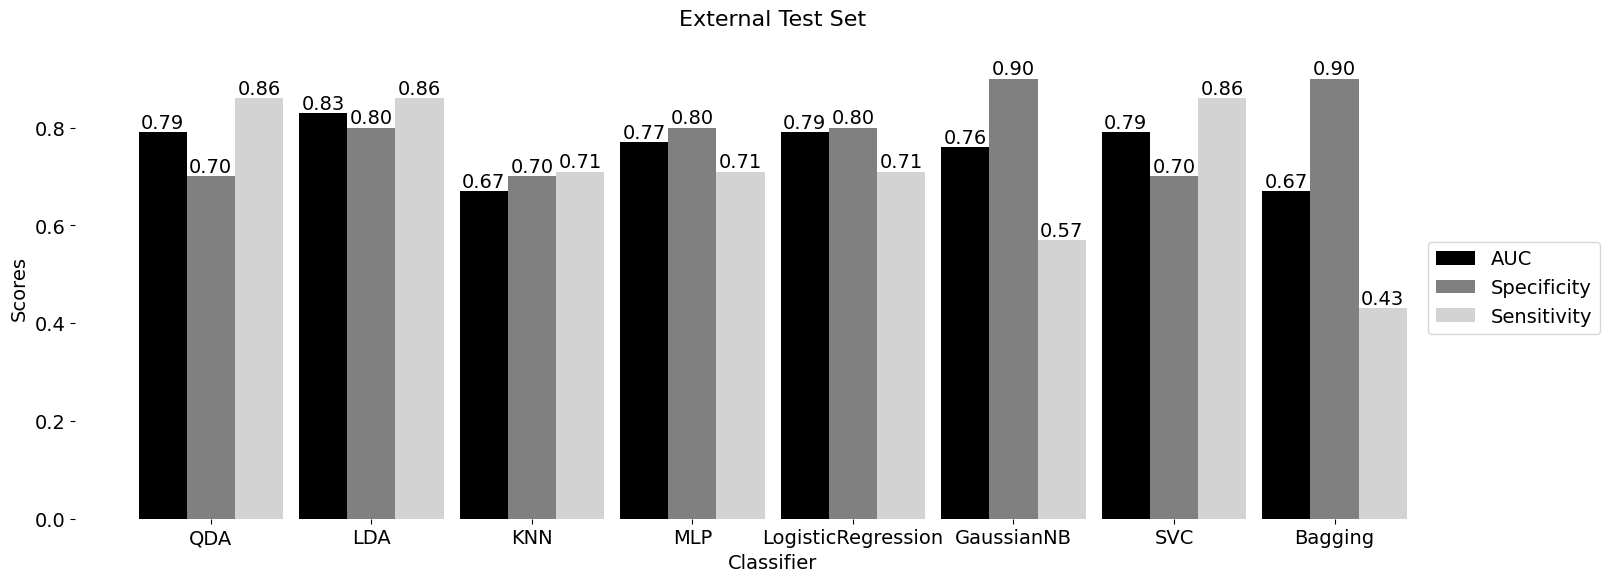

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# 假设您的数据存储在列表中
classifiers = ['QDA', 'LDA', 'KNN','MLP', 'LogisticRegression','GaussianNB', 'SVC','Bagging']
auc_scores = [0.79, 0.83, 0.67,0.77,0.79,0.76,0.79,0.67]
specificity_scores = [0.7, 0.8, 0.7,0.8,0.8,0.9,0.7,0.9]
sensitivity_scores = [0.86, 0.86, 0.71,0.71,0.71,0.57,0.86,0.43]

# 创建一个包含分类器的索引数组
x = np.arange(len(classifiers))

# 创建图形，并指定大小为10x6英寸
fig = plt.figure(figsize=(18, 6))

# 设置柱状图的宽度
width = 0.3

# 在柱状图上添加数字标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2., height,
                 '%.2f' % height,
                 ha='center', va='bottom',fontsize=14)

autolabel(plt.bar(x, auc_scores, width, label='AUC',color="black"))
autolabel(plt.bar(x + width, specificity_scores, width, label='Specificity',color="gray"))
autolabel(plt.bar(x + width*2, sensitivity_scores, width, label='Sensitivity',color="lightgray"))

# 去掉边框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# 设置x轴标签
plt.xlabel('Classifier',fontsize=14)
# 设置y轴标签
plt.ylabel('Scores',fontsize=14)
# 设置图例
plt.legend(loc=5,bbox_to_anchor=(1.1, 0.5),fontsize=14)
# 设置x轴刻度和y轴标签
plt.xticks(x + width, classifiers, fontsize=14)
plt.yticks(np.arange(0, 1, 0.2),fontsize=14)

plt.title("External Test Set",fontsize=16,y=1.05)
#保存图片
plt.savefig('chart2.pdf', format='pdf')
# 显示图形
plt.show()